In [1]:
#%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import marshaltools
from ast import literal_eval
import logging
from astropy.time import Time
from ipywidgets import interactive
import ipywidgets as widgets
import re, os
import sncosmo

/home/jnordin/local/miniconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/jnordin/local/miniconda2/envs/py36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


In [2]:
username = 'jnordin'
date = '2018-09-23'
maxz = 0.1
minpeakmag = 19.5   # A candidate need to have at least one detection brigther than this
mindet = 5          # A candidate need to have at least this many detections
maxage = 30         # If a detection has an age older than this, skip (stars,age). 
                    # Q: How can histories be older than 30days?

marshal_savid = 42
logpath = '/home/jnordin/local/git/AmpelSlackCosmology/'

# log
logger = logging.getLogger(username)
handler = logging.FileHandler(logpath+'ztfcosmo_trigger_%s_%s.log'%(date,username))
handler.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
handler.setFormatter(formatter)
logger.addHandler(handler)

manual_inspection=[]

In [3]:
# Now fun starts for real. 
pl = marshaltools.ProgramList('AMPEL Test',load_candidates=False)

DEBUG:marshaltools.ProgramList:listing accessible programs
DEBUG:marshaltools.ProgramList:Starting list_programs.cgi post. Attempt # 0
DEBUG:marshaltools.ProgramList:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/list_programs.cgi?None
DEBUG:marshaltools.ProgramList:Successful growth connection.
INFO:marshaltools.ProgramList:Initialized ProgramList for program AMPEL Test (ID 4)
DEBUG:marshaltools.ProgramList:Starting list_program_sources.cgi post. Attempt # 0
DEBUG:marshaltools.ProgramList:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/list_program_sources.cgi?programidx=4&getredshift=1&getclassification=1
DEBUG:marshaltools.ProgramList:Successful growth connection.
INFO:marshaltools.ProgramList:Loaded 172 saved sources for program AMPEL Test.


In [ ]:
#pl.fetch_all_lightcurves()

INFO:jnordin:SN ZTF18aasdted classified with type SN Ia, skipping.
INFO:jnordin:SN ZTF18aauvptt classified with type AGN, skipping.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
58318.268999999855 p48r                0.0  12.16270002557437 25.0    ab
58321.211999999825 p48r                0.0 17.580450336617684 25.0    ab
 58324.21100000013 p48r                0.0  64.42137582566869 25.0    ab
 58324.29410000006 p48g                0.0  32.28717113652971 25.0    ab
58327.187899999786 p48g                0.0 30.551321164761497 25.0    ab
 58327.29339999985 p48r                0.0  31.99116057229342 25.0    ab
58330.187200000044 p48g                0.0  9.661176040795462 25.0    ab
 58330.31449999986 p48r                0.0 22.752545716468642 25.0    ab
 58333.16149999993 p48r                0.0 14.093861379342957 25.0    ab
 58333.17180000013 p48g                0.0  9.057951598072423 25.0    ab
               ...  ...                ...                ...  ...   ...
58369.173599999864 p48r 102.80162981264746 16.09624

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abddhaa
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
58295.459199999925 p48r 177.01089583174237 17.933636601746443 25.0    ab
58295.470000000205 p48g  64.86344335482391 13.143116601919152 25.0    ab
 58295.48089999985 p48r 233.34580622810068 19.342748697606066 25.0    ab
58296.331300000194 p48r  275.4228703338172  32.97759896601453 25.0    ab
 58311.38670000015 p48r  237.6840286624881  32.83726207446088 25.0    ab
 58314.36730000004 p48g  195.8844673505991 18.041626178822735 25.0    ab
 58317.40870000003 p48r 192.30917289101595 26.568494084692084 25.0    ab
 58329.34299999988 p48r 203.23570109362208 37.437399656189434 25.0    ab
 58332.24049999984 p48g 154.17004529495583 15.619544515624813 25.0    ab
58338.180999999866 p48g  197.6969640111858  20.02941961954282 25.0    ab
58341.319699999876 p48r 210.86281499332864   34.9581293618688 25.0    ab
58344.310800000094 p48r 255.85858869056452  30.6350

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abddgzz
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
58295.459199999925 p48r 239.88329190194898 24.303474447637754 25.0    ab
58295.470000000205 p48g 436.51583224016656 20.102296963441947 25.0    ab
 58295.48089999985 p48r 483.05880203977335 17.796543945861504 25.0    ab
 58296.44909999985 p48g 201.37242498623917 29.675337210456075 25.0    ab
 58299.44510000013 p48g 353.18316979195737  39.03524648924861 25.0    ab
 58302.43280000007 p48g 135.51894123510337 23.715335936877672 25.0    ab
 58305.32759999996 p48g 183.65383433483476 23.681200547792965 25.0    ab
58308.370600000024 p48r 222.84351492703053 22.577110843820574 25.0    ab
 58311.34359999979 p48g 164.43717232149308 15.145223268862523 25.0    ab
 58314.41110000014 p48r  519.9959965335157 28.736040720831763 25.0    ab
               ...  ...                ...                ...  ...   ...
 58357.27369999979 p48r 501.18723362727246  36.9288

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abgucjb
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58292.47740000021 p48r                0.0  12.85375434634039 25.0    ab
 58296.36139999982 p48r                0.0 44.160094660377986 25.0    ab
 58296.47340000002 p48g                0.0 26.365134771128176 25.0    ab
58299.419999999925 p48r                0.0 23.606412713034594 25.0    ab
 58299.46510000015 p48g                0.0  22.54394912351019 25.0    ab
 58302.41349999979 p48r                0.0 28.643757985470877 25.0    ab
 58302.44299999997 p48g                0.0 18.751240138517606 25.0    ab
  58305.4328999999 p48r                0.0 16.789199730387928 25.0    ab
 58305.45729999989 p48g                0.0  16.33164742717187 25.0    ab
58310.443299999926 p48r                0.0 15.171551500583671 25.0    ab
               ...  ...                ...                ...  ...   ...
58364.322399999946 p48r 178.64875748520498  24.6812

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablvpuj
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux            fluxerr        zp  zpsys
------------------ ---- ----------------- ------------------ ---- -----
 58308.19859999977 p48g               0.0 10.496149204995461 25.0    ab
 58308.24589999998 p48r               0.0 11.403285445614957 25.0    ab
 58310.39209999982 p48r               0.0 16.033561267753612 25.0    ab
 58312.22189999977 p48r               0.0  11.83123268350948 25.0    ab
58312.332799999975 p48g               0.0 12.051191721487148 25.0    ab
 58315.24869999988 p48r               0.0 18.240216787118175 25.0    ab
 58316.24399999995 p48r               0.0  19.27658047247943 25.0    ab
 58318.39140000008 p48g               0.0 11.298739496246046 25.0    ab
 58319.36450000014 p48g               0.0 14.894639478119776 25.0    ab
 58321.19249999989 p48g               0.0 20.942570961018014 25.0    ab
               ...  ...               ...                ...  ...   ...
 58370.15549999988 p48r 86.29785477669702 12.717321853836006 25.

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablqqeb
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58306.29989999998 p48g                0.0  9.484839705204907 25.0    ab
58310.328699999955 p48g                0.0  9.572601846452761 25.0    ab
 58316.23290000018 p48r                0.0 10.691287187939439 25.0    ab
 58319.28030000022 p48r                0.0 13.092723481345493 25.0    ab
 58322.22899999982 p48g                0.0 18.072989474446047 25.0    ab
 58322.25369999977 p48r                0.0 15.171551500583671 25.0    ab
 58325.17070000013 p48g                0.0  29.71871284574015 25.0    ab
58325.220199999865 p48r                0.0 23.606412713034594 25.0    ab
 58330.20550000016 p48g                0.0  13.33613538427243 25.0    ab
58330.309599999804 p48r                0.0               20.0 25.0    ab
               ...  ...                ...                ...  ...   ...
          58355.25 p48r 112.71974561755094  18.6873

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablviog
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
58310.443299999926 p48r                0.0 15.171551500583671 25.0    ab
 58313.42430000007 p48r                0.0 12.051191721487148 25.0    ab
58313.453699999955 p48g                0.0  9.311721870459197 25.0    ab
 58316.43390000006 p48g                0.0  29.71871284574015 25.0    ab
 58316.45330000017 p48r                0.0 11.508798746743128 25.0    ab
 58319.42169999983 p48g                0.0  8.035816216978812 25.0    ab
 58319.44980000006 p48r                0.0 10.890053056848423 25.0    ab
 58322.40939999977 p48r 41.304750199016105 10.271631824434515 25.0    ab
58322.443200000096 p48g  40.55085354483837  9.710666251575079 25.0    ab
 58325.44340000022 p48g                0.0 29.446250048654417 25.0    ab
 58328.43140000012 p48r                0.0  40.64714021872442 25.0    ab
 58328.48260000022 p48g                0.0 166.3527

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablwwwb
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
  58308.2080000001 p48g                0.0  8.811097270131064 25.0    ab
 58308.22640000004 p48g                0.0  8.811097270131064 25.0    ab
 58308.22679999983 p48g                0.0  8.811097270131064 25.0    ab
 58308.22779999999 p48g                0.0   8.57097040794878 25.0    ab
 58308.31380000012 p48r                0.0 15.596602210465187 25.0    ab
 58308.33210000023 p48r                0.0  34.12164778006242 25.0    ab
 58308.33259999985 p48r                0.0  40.64714021872442 25.0    ab
58308.336999999825 p48r                0.0   59.8452927321639 25.0    ab
58308.380200000014 p48g                0.0 13.584072652343673 25.0    ab
 58311.19240000006 p48r                0.0 12.051191721487148 25.0    ab
               ...  ...                ...                ...  ...   ...
 58361.13659999985 p48r 108.64256236170655  16.0101

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablowct
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
  58310.4356999998 p48r                0.0 18.408991435063434 25.0    ab
58313.403400000185 p48r                0.0 10.790212450302535 25.0    ab
 58316.41509999987 p48g                0.0  9.484839705204907 25.0    ab
  58319.4160000002 p48g                0.0   7.60378792641122 25.0    ab
58319.443200000096 p48r                0.0 11.092514259158209 25.0    ab
  58322.4160000002 p48r                0.0 10.304572891635145 25.0    ab
 58322.41889999993 p48g                0.0  8.650276620700177 25.0    ab
 58325.41960000014 p48g                0.0 29.446250048654417 25.0    ab
 58325.46710000001 p48r                0.0 24.492323985300953 25.0    ab
 58328.41250000009 p48r                0.0 44.568702985406105 25.0    ab
               ...  ...                ...                ...  ...   ...
 58349.33330000006 p48r 255.85858869056452 16.49581

INFO:jnordin:SN ZTF18abmxfrc classified with type SN Ia, skipping.
DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abmjzjq
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58320.35250000004 p48r                0.0  15.31193213822514 25.0    ab
 58321.17230000021 p48g                0.0  37.75982698192593 25.0    ab
 58321.20539999986 p48g                0.0 21.136350184273148 25.0    ab
 58321.21400000015 p48r                0.0 17.259570955339406 25.0    ab
 58321.23300000001 p48r                0.0 16.482762300260035 25.0    ab
 58321.27650000015 p48r                0.0 16.789199730387928 25.0    ab
  58322.2285000002 p48g                0.0  21.72851247234131 25.0    ab
 58322.23300000001 p48r                0.0 15.171551500583671 25.0    ab
 58322.26979999989 p48r                0.0 16.944548282811933 25.0    ab
 58322.27520000003 p48r                0.0  18.92474322731589 25.0    ab
               ...  ...                ...                ...  ...   ...
 58365.22030000016 p48g  82.41381150130017 15.94024

INFO:jnordin:SN ZTF18abnxhmc classified with type SN Ia, skipping.
INFO:jnordin:SN ZTF18abnvnqb classified with type SN Ia, skipping.
INFO:jnordin:SN ZTF18abkxlcz classified with type SN Ia, skipping.
DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abokvkt
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux            fluxerr        zp  zpsys
------------------ ---- ----------------- ------------------ ---- -----
 58322.39740000013 p48r               0.0 11.298739496246046 25.0    ab
58322.397900000215 p48r               0.0 11.508798746743128 25.0    ab
58322.421200000215 p48g               0.0  9.141763792297489 25.0    ab
 58322.45539999986 p48g               0.0  9.311721870459197 25.0    ab
 58325.27240000013 p48r               0.0 45.817353055355404 25.0    ab
 58325.27279999992 p48r               0.0  39.17689347011982 25.0    ab
58325.415899999905 p48g               0.0  34.12164778006242 25.0    ab
 58325.41630000016 p48g               0.0 28.381150433781823 25.0    ab
 58328.33589999983 p48r               0.0 50.702572609958246 25.0    ab
 58328.41479999991 p48r               0.0  47.53680573249762 25.0    ab
               ...  ...               ...                ...  ...   ...
 58369.27699999977 p48g 73.79042301291022 14.272333154961158 25.

INFO:jnordin:SN ZTF18aboaeqy classified with type SN Ia, skipping.
DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18aboivnq
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58321.27600000007 p48r                0.0 15.032457880364129 25.0    ab
 58321.39559999993 p48g                0.0  11.83123268350948 25.0    ab
 58322.16809999989 p48g                0.0 27.103788247020674 25.0    ab
 58322.18949999986 p48g                0.0 21.136350184273148 25.0    ab
 58322.20930000022 p48g                0.0 26.365134771128176 25.0    ab
 58322.21020000009 p48g                0.0 26.365134771128176 25.0    ab
 58322.23199999984 p48r                0.0  15.31193213822514 25.0    ab
 58322.25219999999 p48r                0.0 16.789199730387928 25.0    ab
 58322.27419999987 p48r                0.0 17.259570955339406 25.0    ab
  58323.2239000001 p48r                0.0  26.12341776263681 25.0    ab
               ...  ...                ...                ...  ...   ...
 58374.24649999989 p48g 118.03206356517298  19.5680

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abmjayl
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58322.40430000005 p48r                0.0 10.023744672545451 25.0    ab
 58322.44840000011 p48g                0.0  8.185213194600227 25.0    ab
 58323.45489999978 p48g                0.0 10.304572891635145 25.0    ab
 58323.47660000017 p48r                0.0  9.141763792297489 25.0    ab
58324.453600000124 p48g                0.0 14.894639478119776 25.0    ab
 58324.47310000006 p48r                0.0  8.974907798662636 25.0    ab
  58325.4012000002 p48g                0.0 32.887434464298615 25.0    ab
58325.472800000105 p48r                0.0 14.894639478119776 25.0    ab
58326.413199999835 p48r                0.0               20.0 25.0    ab
 58326.48290000018 p48g                0.0  22.13247567955333 25.0    ab
               ...  ...                ...                ...  ...   ...
 58346.39009999996 p48r   487.528490103386 31.43212

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abnblil
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58322.38959999988 p48r                0.0 11.195152029902214 25.0    ab
58322.427699999884 p48g                0.0  8.185213194600227 25.0    ab
 58323.26970000006 p48r                0.0 12.972688670964782 25.0    ab
 58323.40249999985 p48g                0.0 16.482762300260035 25.0    ab
 58324.23270000005 p48r                0.0  21.72851247234131 25.0    ab
58324.400700000115 p48g                0.0  30.27122496872414 25.0    ab
 58325.18969999999 p48g                0.0 37.413642807315995 25.0    ab
58325.288000000175 p48r                0.0  21.33192242460516 25.0    ab
 58326.35179999983 p48r                0.0 28.381150433781823 25.0    ab
58326.421200000215 p48g                0.0  85.70970407948784 25.0    ab
               ...  ...                ...                ...  ...   ...
58363.191300000064 p48g 143.21878992735438 23.74368

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0
DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18abmszpd
DEBUG:marshaltools.gci_utils:Successful growth connection.
/home/jnordin/local/miniconda2/envs/py36/lib/python3.6/site-packages/marshaltools-0.0.3-py3.6.egg/marshaltools/MarshalLightcurve.py:120: RuntimeWarning: overflow encountered in double_scalars
  eflux[n] = 10**(-0.4*(r['limmag']-zp[n]))/5.
INFO:jnordin:SALT fit fails for SN ZTF18abmszpd. Manual inspection prob needed.
DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
58322.428199999966 p48g                0.0 10.399919930670313 25.0    ab
  58323.4029000001 p48g                0.0  19.27658047247943 25.0    ab
 58324.42070000013 p48g                0.0 24.718948668890214 25.0    ab
 58325.40980000002 p48g                0.0  36.39401717219961 25.0    ab
58326.429599999916 p48g                0.0  36.73076686696695 25.0    ab
 58327.45660000015 p48g                0.0                inf 25.0    ab
 58328.44790000003 p48g                0.0                inf 25.0    ab
 58329.41550000012 p48g                0.0  24.26777700929957 25.0    ab
 58330.28899999987 p48g                0.0  22.13247567955333 25.0    ab
 58331.29879999999 p48g                0.0 20.750568316360233 25.0    ab
               ...  ...                ...                ...  ...   ...
58346.319500000216 p48g  529.6634438916575 29.27028

DEBUG:marshaltools.gci_utils:request URL: http://skipper.caltech.edu:8080/cgi-bin/growth/print_lc.cgi?name=ZTF18ablovvu
DEBUG:marshaltools.gci_utils:Successful growth connection.


       mjd         band        flux             fluxerr        zp  zpsys
------------------ ---- ------------------ ------------------ ---- -----
 58322.36500000022 p48r                0.0 12.972688670964782 25.0    ab
 58322.37699999986 p48r                0.0  11.83123268350948 25.0    ab
58322.410399999935 p48r                0.0  9.484839705204907 25.0    ab
  58322.4112999998 p48r                0.0 10.304572891635145 25.0    ab
 58322.45289999992 p48g                0.0 10.304572891635145 25.0    ab
 58322.45390000008 p48g                0.0 10.496149204995461 25.0    ab
 58322.47929999977 p48g                0.0  9.311721870459197 25.0    ab
 58323.26569999987 p48r                0.0  29.71871284574015 25.0    ab
 58323.46579999989 p48r                0.0 10.023744672545451 25.0    ab
58324.236099999864 p48r                0.0 325.85920652794493 25.0    ab
               ...  ...                ...                ...  ...   ...
58351.377499999944 p48r 113.76272858234321 12.57352

DEBUG:marshaltools.gci_utils:Starting print_lc.cgi post. Attempt # 0


KeyboardInterrupt: 

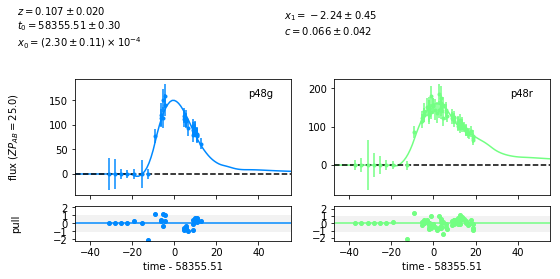

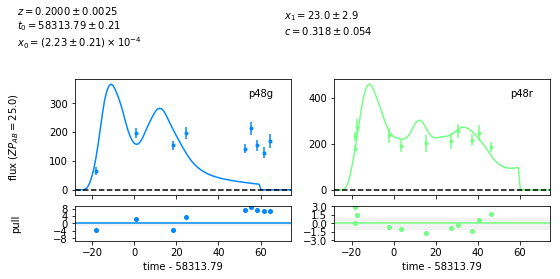

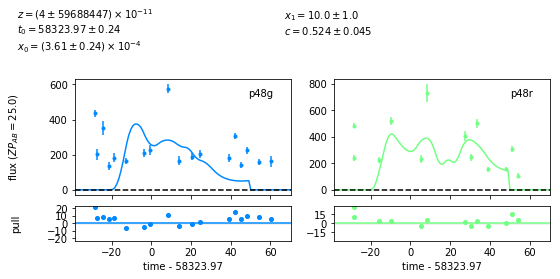

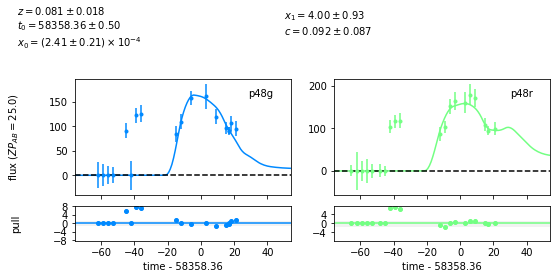

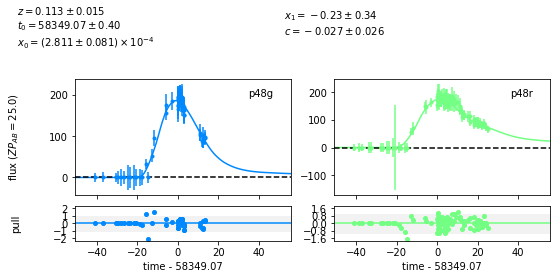

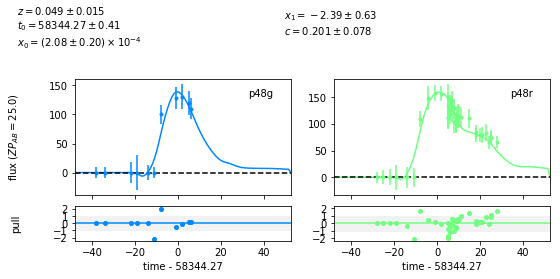

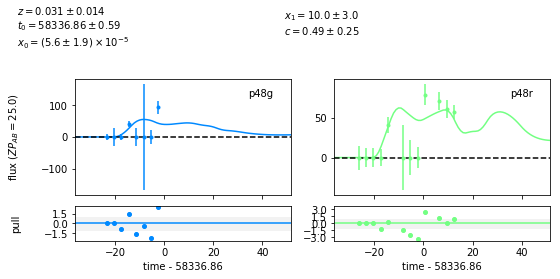

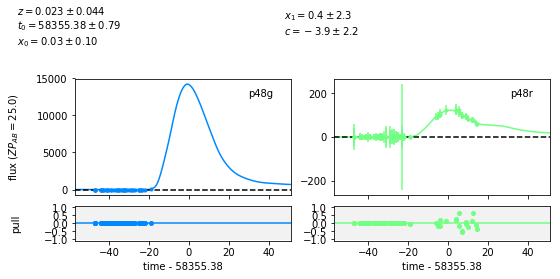

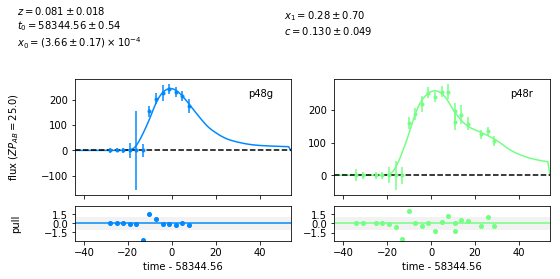

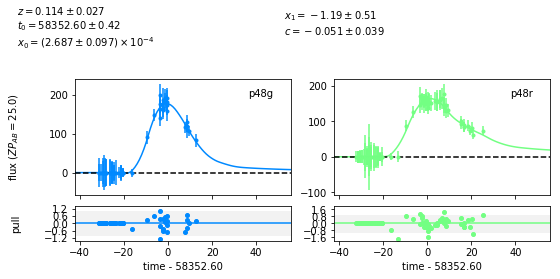

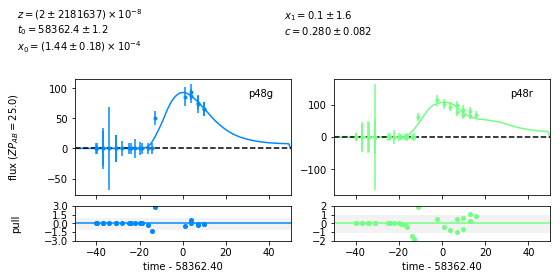

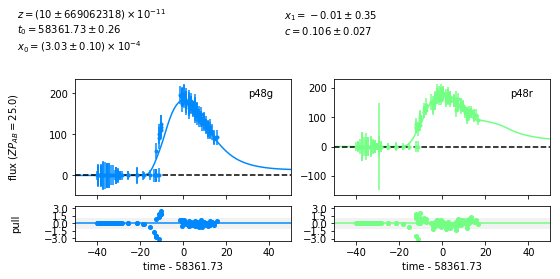

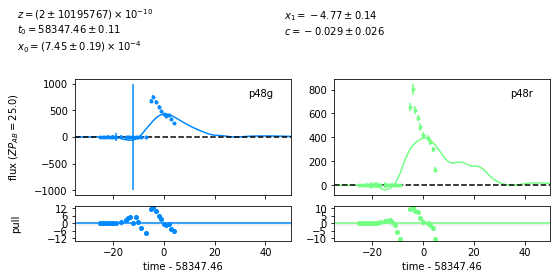

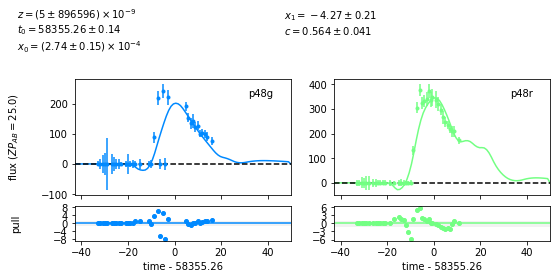

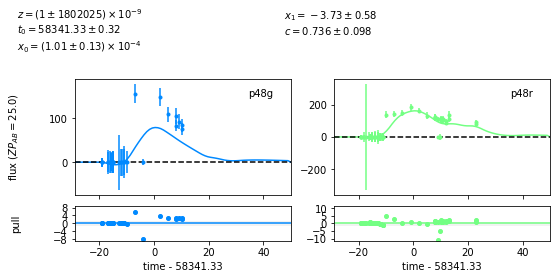

In [6]:

for sn in pl.sources.keys():
    if not pl.sources[sn]['classification'] is None:
        logger.info("SN %s classified with type %s, skipping."%(sn,pl.sources[sn]['classification']))
        continue
        
    # Download specific LC
    lc = pl.get_lightcurve(sn)

    # Check nbr filters filters
    if len(np.unique(lc.table["filter"][lc.table["magpsf"]<99] ))<2:
        logger.info("SN %s has too few filters for saltfit."%(sn))
        continue
    
    # create a model
    model = sncosmo.Model(source='salt2')
    
    
    # run the fit
    try:
        result, fitted_model = sncosmo.fit_lc(
            lc.table_sncosmo, model,
            ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
            bounds={'z':(0., 0.2)})  # bounds on parameters (if any)
        pl.sources[sn]['SNCOSMOfit'] = result, fitted_model
        sncosmo.plot_lc(lc.table_sncosmo, model=fitted_model, errors=result.errors)
        plt.savefig('/home/jnordin/tmp/%s.png'%(sn))

            
    except ValueError:
        print("Why does fit fail for %s?"%(sn))
        manual_inspection.append(sn)
        logger.info("SALT fit fails for SN %s. Manual inspection prob needed."%(sn))
        
        continue

        

In [11]:
visual_inspect = []
for sn in pl.sources.keys():
    if not 'SNCOSMOfit' in pl.sources[sn].keys():
        continue
    visual_inspect.append(sn)
print("Found %s lightcurves to inspect"%(len(visual_inspect)))     



Found 15 lightcurves to inspect


In [12]:
snnbr = 0
decisions = {}

In [13]:
# Function to make stupid plot of a SN lightcurve
def plotty(i):
    """
    Flash SNCOSMO fit plot
    """
    
    global snnbr
    
    
    # Evaluate reply
    snname = visual_inspect[snnbr]
    if i == 'TooLate':
        logger.info("%s Faded too much while waiting. Call P200 or Keck?"%(snname))
        decisions[snnbr] = i
        snnbr += 1
    elif i == 'RCF':
        logger.info("SN %s hould be observed as part of RCF."%(snname))
        decisions[snnbr] = i
        snnbr += 1

    elif i == 'GetIt':
        logger.info("We should make sure to type %s. "%(snname))
        decisions[snnbr] = i
        snnbr += 1
    elif i == 'GoBack':
        logger.info("I want to scan some more, go back!")
        snnbr -= 1
    elif i=='Nothing':
        # Lets do nothing
        pass
    
    # Are we done?
    if snnbr==len(visual_inspect):
        print( "Seems like we are all done. How do we exit?")
        return False
    
    
    # Reset    
    snname = visual_inspect[snnbr]
    
    model = sncosmo.Model(source='salt2')

    
    
# lc = pl.get_lightcurve(snname)
#    result, fitted_model = sncosmo.fit_lc(
#            lc.table_sncosmo, model,
#            ['z', 't0', 'x0', 'x1', 'c'],  # parameters of model to vary
#            bounds={'z':(0., 0.2),'x1':(-5,5),'t0':(Time.now().jd-50,Time.now().jd+50)})  # bounds on parameters (if any)
    result, fitted_model = pl.sources[snname]['SNCOSMOfit']  
    sncosmo.plot_lc(lc.table_sncosmo, model=fitted_model, errors=result.errors)
    
    plt.title(snname + ' ' + str(snnbr) + ' out of '+str(len(visual_inspect)))
    plt.show()
    wiggy.value = 'Nothing'
    
    return (i)


wiggy = widgets.RadioButtons(
    options=['Nothing','TooLate', 'RCF', 'GetIt','GoBack'],
    value='Nothing',
    description='Action:',
    disabled=False
)
y = interactive(plotty,i = wiggy)

In [8]:
# Presumably you want to scan from the first SN, but you can change this and run display again to revisit something
# You cant jump ahead in the list though
snnbr = 0


In [9]:
# This is the all important list of decisions you have made
decisions = {}

In [14]:
# This is the scanning box! 
# You have three choices (Nothing is not a choice and GoBack steps lets you go back in order)
# - Wait : Select this if the transient is rizing and might get into RCF range (~<18.7)
# - Submit : Should probably get a spectrum (you do not need to worry about where just yet)
# - Garbage : Variable star or clearly non SNIa. Evanetually these will be rejected and never more show up
display(y)

interactive(children=(RadioButtons(description='Action:', options=('Nothing', 'TooLate', 'RCF', 'GetIt', 'GoBa…

In [ ]:
# Lets try to ingest the sne that were previously candidates.
def ingest(avroid, ProgramList,programidx):
    """
    Ingesting some avro into a program described by a marshaltools ProgramList object
    """
    
    marshal_root = 'http://skipper.caltech.edu:8080/cgi-bin/growth/'
    ingest_url = marshal_root + 'ingest_avro_id.cgi'
    
    postdata = {'programidx':str(programidx),'avroid':str(avroid)}
    request = requests.post(ingest_url,data=postdata, auth=(ProgramList.user,ProgramList.passwd))
    return request

In [ ]:
ingestoldcand_start = Time.now()
print("Starting ingesting at %s (useful if you want to check scanning page directly)"%(ingestoldcand_start))
for snnbr, choice in decisions.items():
    if not choice=='Submit' : continue
    #if sncandidates[snnbr] in pl.candidates.keys(): continue
    # Whic h
    avroid =  np.max( df_phot['_id'][ df_phot["ztf_name"]==sncandidates[snnbr] ]  )
    print("Trying to ingest %s through avroid %s"%(sncandidates[snnbr],avroid))
    canddate = pl.find_source(sncandidates[snnbr],include_candidates=True)
    if not canddate is None:
        print('... already a candidate with id %s'%(canddate['candid']))
        continue
    
    print("now we need to be anal")
#    request = ingest(avroid,pl,marshal_savid)
    
#    canddate = pl.find_source(sncandidates[snnbr],include_candidates=True)
    #print(canddate["candid"])
    #print(canddate)
ingestoldcand_end = Time.now()
print("Stoppedingesting at %s (useful if you want to check scanning page directly)"%(ingestoldcand_end))

In [ ]:
# Now fun starts for real. Lets download all the candidates and check whether we find all the candidate ids there
# (cause are the only that are useful for saving). This will take a while.
pl = marshaltools.ProgramList('AMPEL Test',load_candidates=True)

In [ ]:
# We first need to make sure these are ingested so we can get candidate IDs
for snnbr, choice in decisions.items():
    if not choice=='Submit' : continue
    
    snname = sncandidates[snnbr]
    
    if not snname in pl.candidates.keys():
        print( "%s not among candidates though submitted"%(snname) )
        continue
    else:
        if not 'candid' in pl.candidates[sncandidates[snnbr]].keys():
            print( "All candidates should have candid, right?" )
            sys.exit('yee')
            
        print("%s %s"%(sncandidates[snnbr], pl.candidates[sncandidates[snnbr]]['candid']))
    
    #print(candidates[sncandidates[snnbr]].keys())
    
    #weblink= path % (sncandidates[snnbr], marshal_savid)
    #print(weblink)
    
    print(pl.candidates[sncandidates[snnbr]].keys())
    continue


In [ ]:
from marshaltools.gci_utils import growthcgi

In [ ]:
def get_marshal_html(weblink, max_attempts=5, marshalusr=None,marshalpwd=None):

    auth = requests.auth.HTTPBasicAuth(marshalusr, marshalpwd)
    attempts = 1

	while attempts<max_attempts:	
		try:
			reponse = requests.get(weblink, auth=auth, timeout=30+(60*attempts-1))
			return reponse.text
		except Exception as e:
			log.error('Sergeant.get_marshal_html(): problem with url: {0} \n{1} \nthis attempt number {2}, {3} left'.format(weblink, e, attempts, max_attempts-attempts))
			time.sleep(3)
		attempts+=1

	log.error('giving up')
	raise(requests.exceptions.ConnectionError) 

In [ ]:
weblink = 'http://skipper.caltech.edu:8080/cgi-bin/growth/save_cand_growth.cgi?candid=ZTF18abecggb&program=4'

In [ ]:
foo = get_marshal_html(weblink,marshalusr=os.environ['GROWTHUSER'], marshalpwd=os.environ['GROWTHPWD'])

In [ ]:
print(foo)

In [ ]:
decisions = {0: 'Garbage', 1: 'Garbage', 2: 'Garbage', 3: 'Garbage', 4: 'Garbage', 5: 'Wait', 6: 'Wait', 7: 'Garbage', 8: 'Submit', 9: 'Submit', 10: 'Garbage', 11: 'Garbage', 12: 'Garbage', 13: 'Garbage', 14: 'Garbage', 15: 'Submit', 16: 'Submit', 17: 'Garbage', 18: 'Submit', 19: 'Submit', 20: 'Submit', 21: 'Garbage', 22: 'Garbage', 23: 'Garbage', 24: 'Garbage', 25: 'Garbage', 26: 'Garbage', 27: 'Garbage', 28: 'Garbage', 29: 'Garbage', 30: 'Garbage', 31: 'Garbage', 32: 'Garbage', 33: 'Garbage', 34: 'Garbage', 35: 'Garbage', 36: 'Garbage', 37: 'Garbage', 38: 'Submit', 39: 'Garbage', 40: 'Submit', 41: 'Submit', 42: 'Submit', 43: 'Submit', 44: 'Garbage', 45: 'Garbage', 46: 'Submit', 47: 'Garbage', 48: 'Garbage', 49: 'Garbage', 50: 'Submit'}